# CHI 2 Demo
Used for testing hypotheses, based on dependency between nominal variables, or for selecting meaningful features.

## Libraries

In [71]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import matplotlib.pyplot as plt 

## 1. Hypotheses Testing

### Data
Frequency distribution of the observed values of (one or) two nominal variables.<br>
- Ho: the Y variable doesn't depend on X variable or vice versa
- Ha: they are dependent

In [ ]:
observed = np.array([[15, 6], [35, 44]])
print(observed)

In [ ]:
stat, p, dof, expected = chi2_contingency(observed)

Expected values are calculated as 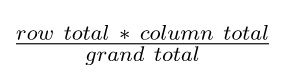 for each cell of the table.

In [ ]:
print(expected)

In [ ]:
# Degrees of freedom are calculates as (rows-1)(cols-1)
dof

Chi2 (stat) is calculated as a sum of 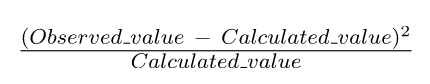 for each table cell.

In [ ]:
print(stat)

In [ ]:
# p is taken froma a table, dof and alpha are input parameters 
alpha = 0.05
p

In [ ]:
# interpret p-value
if p <= alpha:
    print('variables are dependent, reject Ho')
else:
    print('Variables are independent, Ho holds true)')

### Visualisation

In [ ]:
# dof=2

In [ ]:
critical_value = stats.chi2.ppf(1 - alpha, dof) 
critical_value

In [ ]:
calculated_chi_square = stat
calculated_chi_square

In [ ]:
# Generate values for the chi-square distribution 
x = np.linspace(0, 10, 1000) 
y = stats.chi2.pdf(x, dof) 
  
plt.plot(x, y, label='Chi-Square Distribution (dof=1)') 
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Critical Region') 
plt.axvline(calculated_chi_square, color='blue', linestyle='dashed', label='Calculated Chi-Square') 
plt.axvline(critical_value, color='green', linestyle='dashed', label='Critical Value') 
plt.title('Chi-Square Distribution and Critical Region') 
plt.xlabel('Chi-Square Value') 
plt.ylabel('Probability Density Function') 
plt.legend() 
plt.show() 

## 2. Feature Engineering

### Data
Labeled test data

In [60]:
data = np.array([
[5.1, 3.5, 1.4, 0.2, 0],
[4.9, 3.0, 1.4, 0.3, 0],
[4.7, 3.2, 1.3, 0.2, 1],
[4.6, 3.1, 1.5, 0.1, 1],
[5.0, 3.6, 1.4, 0.2, 0]])

In [61]:
print(data)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.3 0. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.1 1. ]
 [5.  3.6 1.4 0.2 0. ]]


In [62]:
X = data[:,:-1]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.1],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
y = data[:,-1]
y

array([0., 0., 1., 1., 0.])

In [64]:
# convert to dataframe
df = pd.DataFrame(data)

In [67]:
df.columns = ['feature_1', 'feature_2',  'feature_3',  'feature_4',  'target']
df

,feature_1,feature_2,feature_3,feature_4,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.3,0.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.1,1.0
4,5.0,3.6,1.4,0.2,0.0


In [68]:
# number of features to select
k = 2

In [78]:
# Chi-2 feature selection of top k features  
chi2_selector = SelectKBest(chi2, k=k) 
X_selected = chi2_selector.fit_transform(X, y) 
col_selected = chi2_selector.get_support()
col_selected

array([ True, False, False,  True])

In [79]:
print(df.columns[:-1][cols_selected])

Index(['feature_1', 'feature_4'], dtype='object')


In [80]:
X_selected

array([[5.1, 0.2],
       [4.9, 0.3],
       [4.7, 0.2],
       [4.6, 0.1],
       [5. , 0.2]])

## Reference

Chi-square test in Machine Learning, https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/